In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import sys
import os
path = os.path.abspath('..')
if not path in sys.path:
    sys.path.append(path)

### PCA基本思想
为了找到一个一维的轴，使得当使用这个轴投影到这个轴的时候所有数据的方差最大，假设投影方向
$$u \ \  s.t. ||u|| = 1$$
投影后，投影一维坐标为
$$ X^{(i)T}u $$
目标： 找到一个能够使投影后所有坐标长度相加最大的方向$u$, 投影到这个方向上， 即
__Choose u__
$$ \max_{u, ||u||=1} \frac{1}{m} \sum_{i=1}^{m}(X^{(i)T}u)^2$$
化简后有
$$ u^{T} \cdot (\frac{1}{m} \sum_{i=1}^{m} X^{(i)}X^{(i)T}) \cdot u $$

中间$$\frac{1}{m} \sum_{i=1}^{m} X^{(i)}X^{(i)T}$$刚好等于$COV$，对于这个优化， 当这个值等于最大的特征值的时候，取得最大
由于对任意矩阵都有
$$ Au = \lambda u $$ 其中$\lambda$是$A$的特征值，$u$是$A$的特征向量，因此，当特征值取得最大值时优化目标最大。此时$u$是最大的特征值对应的特征向量，$x^{(i)T}u$即投影后的值

In [5]:
from dataset.cleardata import iris

In [18]:
data = iris()[:, :-1]
data = (data - data.mean(0)) / data.std()
label = iris()[:, -1]
data, label 

(array([[ -3.76561784e-01,   2.25937071e-01,  -1.19486600e+00,
          -5.05909913e-01],
        [ -4.77878856e-01,  -2.73556094e-02,  -1.19486600e+00,
          -5.05909913e-01],
        [ -5.79195928e-01,   7.39614626e-02,  -1.24552454e+00,
          -5.05909913e-01],
        [ -6.29854464e-01,   2.33029266e-02,  -1.14420747e+00,
          -5.05909913e-01],
        [ -4.27220320e-01,   2.76595607e-01,  -1.19486600e+00,
          -5.05909913e-01],
        [ -2.24586176e-01,   4.28571215e-01,  -1.04289039e+00,
          -4.04592841e-01],
        [ -6.29854464e-01,   1.75278535e-01,  -1.19486600e+00,
          -4.55251377e-01],
        [ -4.27220320e-01,   1.75278535e-01,  -1.14420747e+00,
          -5.05909913e-01],
        [ -7.31171537e-01,  -7.80141455e-02,  -1.19486600e+00,
          -5.05909913e-01],
        [ -4.77878856e-01,   2.33029266e-02,  -1.14420747e+00,
          -5.56568449e-01],
        [ -2.24586176e-01,   3.27254143e-01,  -1.14420747e+00,
          -5.05909913e-01],

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot(data, f1, f2, label, choose):
    d0 = data[label == 0]
    d1 = data[label == 1]
    d2 = data[label == 2]
    
    plt.plot(d0[:, f1], d0[:, f2], '.r')
    plt.plot(d1[:, f1], d1[:, f2], 'b.')
    plt.plot(d2[:, f1], d2[:, f2], 'g.')

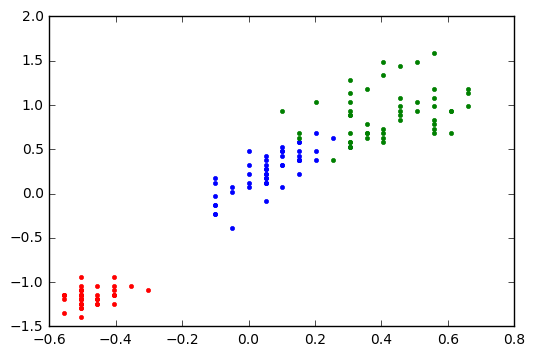

In [15]:
plot(data, 3, 2, label, 0)

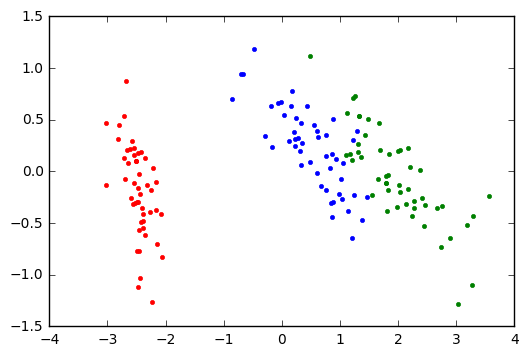

In [49]:
def z_score(data):
    return (data - data.mean(0)) / data.std()

def pca(data):
    mat = z_score(data)
    cov = sp.cov(mat.T)
    x, y = np.linalg.eig(cov)
    ind = np.argsort(-x)
    ft = y[:, ind]
    return np.dot(mat, ft)

d = pca(data)
plot(d, 0, 1, label, 0)